In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [2]:
X_data = pd.read_csv('X_data', index_col='Unnamed: 0')

In [3]:
X_data.head()

,Steps,Distance,High_Activity_Dist,Mod_Activity_dist,Light_Activity_dist,High_Activity_Min,Mod_Activity_Min,Light_Activity_Min,Sed_Min
0,13162.0,8.50,1.88,0.55,6.06,25.0,13.0,328.0,728.0
1,10735.0,6.97,1.57,0.69,4.71,21.0,19.0,217.0,776.0
2,10460.0,6.74,2.44,0.40,3.91,30.0,11.0,181.0,1218.0
3,9762.0,6.28,2.14,1.26,2.83,29.0,34.0,209.0,726.0
4,12669.0,8.16,2.71,0.41,5.04,36.0,10.0,221.0,773.0


In [4]:
X_data.shape

(844, 9)

In [5]:
Y_data = pd.read_csv('Y_data', usecols=[1])

In [6]:
Y_data.head()

,Calories
0,1985.0
1,1797.0
2,1776.0
3,1745.0
4,1863.0


In [7]:
Y_data.shape

(844, 1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=63)

In [9]:
std = StandardScaler()
std.fit(X_train)
std_X_train = std.transform(X_train)

In [10]:
LR = LinearRegression()
LR.fit(std_X_train, Y_train)

LinearRegression()

In [11]:
LR.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [12]:
LR.intercept_

array([2357.2906793])

In [13]:
LR.coef_

array([[-1.88473424e+03,  2.70546070e+03, -9.82787400e+02,
        -2.60720635e+02, -5.12830490e+01,  6.67896504e+02,
         1.80345243e+02,  1.29784354e+00,  6.42199129e+01]])

In [14]:
scores = cross_val_score(LR, std_X_train, Y_train)
print(scores)
print(scores.mean())

[0.72227196 0.74282364 0.79139297 0.73908667 0.77642141]
0.754399328059695


In [15]:
std_X_test = std.transform(X_test)

In [16]:
Y_pred_ols = LR.predict(std_X_test)

In [17]:
r2_ols = r2_score(Y_test, Y_pred_ols)
print(r2_ols)
Model_scores = {'OLS': r2_ols}

0.7688120322202453


In [18]:
LR_rmse = mean_squared_error(Y_test, Y_pred_ols, squared=False)
print(LR_rmse)

367.86832976661213


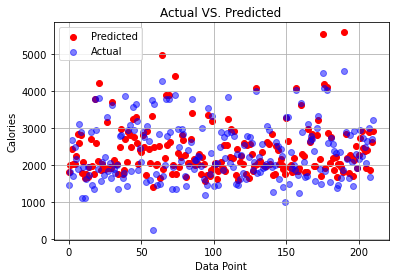

In [19]:
Predicted = plt.scatter(range(0,211,1), Y_pred_ols, c='red')
Actual = plt.scatter(range(0,211,1), Y_test, c='blue', alpha=0.5)
plt.title("Actual VS. Predicted")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((Predicted, Actual),("Predicted", "Actual") )
plt.grid()
plt.show()

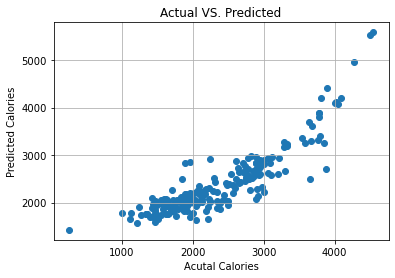

In [20]:
fig, ax = plt.subplots()

ax.scatter(Y_test, Y_pred_ols)
plt.xlabel("Acutal Calories")
plt.ylabel('Predicted Calories')
plt.title("Actual VS. Predicted")
plt.grid()
plt.show()

In [21]:
LRnn = LinearRegression(positive=True)
Y_pred_LRnn = LRnn.fit(std_X_train, Y_train).predict(std_X_test)

In [22]:
LRnn.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        276.2613741 , 408.74106488,  46.82570091,   0.        ,
         87.23297805]])

In [23]:
r2_LRnn = r2_score(Y_test, Y_pred_LRnn)
print(r2_LRnn)

0.5800670402098242


In [24]:
scores = cross_val_score(LRnn, std_X_train, Y_train)
print(scores)

[0.56453535 0.54775045 0.53384819 0.49540168 0.5014409 ]


In [25]:
LRnn_rmse = mean_squared_error(Y_test, Y_pred_LRnn, squared=False)
print(LRnn_rmse)

495.79228938106553


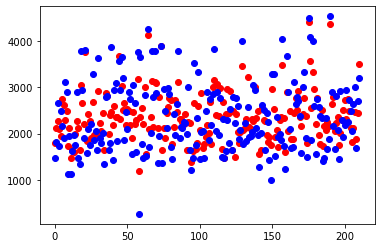

In [26]:
fig, ax = plt.subplots()

ax.scatter(range(0,211,1), Y_pred_LRnn, c='red')
ax.scatter(range(0,211,1), Y_test, c='blue')
plt.show()

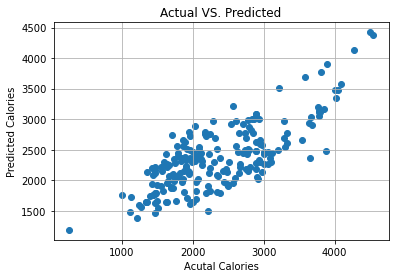

In [27]:
plt.scatter(Y_test, Y_pred_LRnn)
plt.xlabel("Acutal Calories")
plt.ylabel('Predicted Calories')
plt.title("Actual VS. Predicted")
plt.grid()
plt.show()

In [28]:
lasso_mod = Lasso() 

In [29]:
lasso_mod.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [30]:
Y_pred_lasso = lasso_mod.fit(std_X_train, Y_train).predict(std_X_test)

In [31]:
lasso_mod.coef_

array([-1789.78435303,  2507.2039006 ,  -883.28531928,  -233.74045104,
           0.        ,   650.29748754,   172.8909221 ,    -6.20768432,
          63.45989315])

In [32]:
lasso_mod.intercept_

array([2357.2906793])

In [33]:
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print(r2_lasso)
Model_scores['Lasso'] = r2_lasso

0.7690587310269521


In [34]:
scores = cross_val_score(lasso_mod, std_X_train, Y_train)
print(scores)
print(scores.mean())

[0.74064313 0.74329956 0.7885927  0.72874465 0.77657508]
0.7555710239378987


In [35]:
lasso_rmse = mean_squared_error(Y_test, Y_pred_lasso, squared=False)
print(lasso_rmse)

367.67200272126854


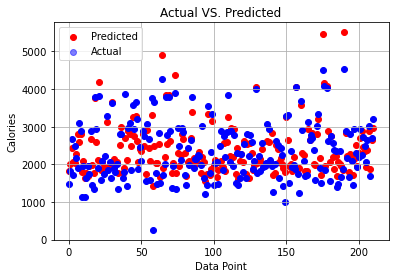

In [36]:
fig, ax = plt.subplots()

ax.scatter(range(0,211,1), Y_pred_lasso, c='red')
ax.scatter(range(0,211,1), Y_test, c='blue')
plt.title("Actual VS. Predicted")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((Predicted, Actual),("Predicted", "Actual") )
plt.grid()
plt.show()

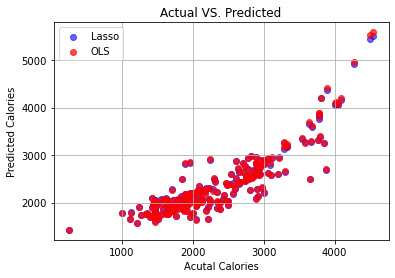

In [37]:
fig, ax = plt.subplots()

l = plt.scatter(Y_test, Y_pred_lasso, c='blue', alpha=0.6)
o = plt.scatter(Y_test, Y_pred_ols, c='red', alpha=0.7)
plt.xlabel("Acutal Calories")
plt.ylabel('Predicted Calories')
plt.title("Actual VS. Predicted")
plt.legend((l,o ),( "Lasso", "OLS") )
plt.grid()
plt.show()

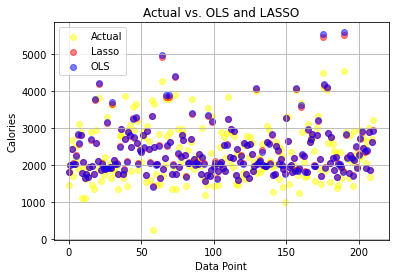

In [38]:
fig, ax = plt.subplots()
a = ax.scatter(range(0,211,1), Y_test, c='yellow', alpha=0.5)
l = ax.scatter(range(0,211,1), Y_pred_lasso, c='red', alpha=0.5)
o = ax.scatter(range(0,211,1), Y_pred_ols, c='blue', alpha=0.5)
plt.title("Actual vs. OLS and LASSO")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((a,l,o),("Actual", "Lasso", "OLS") )
plt.grid()
plt.show()

In [39]:
ridge_mod = Ridge()
Y_pred_ridge = ridge_mod.fit(std_X_train, Y_train).predict(std_X_test)
ridge_mod.coef_

array([[-1590.87734904,  2168.42379349,  -739.17177142,  -243.82577749,
           83.86535517,   615.99540263,   206.2145847 ,   -32.68290905,
           65.29226681]])

In [40]:
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print(r2_ridge)
Model_scores['Ridge'] = r2_ridge

0.7666632254693292


In [41]:
scores = cross_val_score(ridge_mod, std_X_train, Y_train)
print(scores)
print(scores.mean())

[0.73962687 0.73520772 0.77839942 0.71206636 0.77175607]
0.7474112890709209


In [42]:
ridge_rmse = mean_squared_error(Y_test, Y_pred_ridge, squared=False)
print(ridge_rmse)

369.5739757066175


In [43]:
score_df = pd.DataFrame.from_dict(Model_scores, orient= 'index')

In [44]:
print(score_df)

              0
OLS    0.768812
Lasso  0.769059
Ridge  0.766663


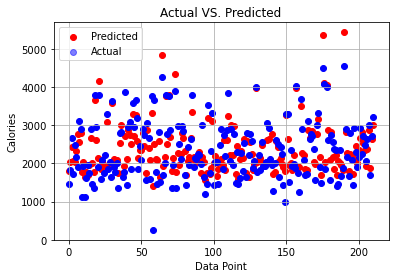

In [45]:
fig, ax = plt.subplots()

ax.scatter(range(0,211,1), Y_pred_ridge, c='red')
ax.scatter(range(0,211,1), Y_test, c='blue')
plt.title("Actual VS. Predicted")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((Predicted, Actual),("Predicted", "Actual") )
plt.grid()
plt.show()

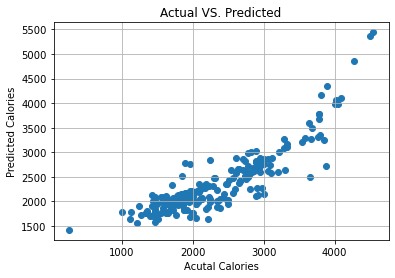

In [46]:
plt.scatter(Y_test, Y_pred_ridge)
plt.xlabel("Acutal Calories")
plt.ylabel('Predicted Calories')
plt.title("Actual VS. Predicted")
plt.grid()
plt.show()

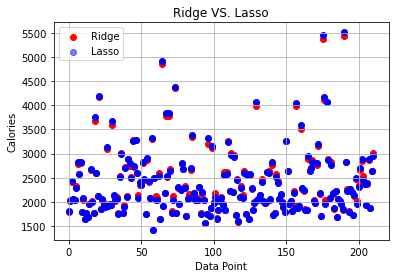

In [47]:
fig, ax = plt.subplots()

ax.scatter(range(0,211,1), Y_pred_ridge, c='red')
ax.scatter(range(0,211,1), Y_pred_lasso, c='blue')
plt.title("Ridge VS. Lasso")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((Predicted, Actual),("Ridge", "Lasso") )
plt.grid()
plt.show()

In [48]:
knn = KNeighborsRegressor()
Y_pred_knn = knn.fit(std_X_train, Y_train).predict(std_X_test)

In [49]:
scores = cross_val_score(knn, std_X_train, Y_train)
print(scores)

[0.50198851 0.65355783 0.65102873 0.52833958 0.60340219]


In [50]:
knn_rmse = mean_squared_error(Y_test, Y_pred_knn, squared=False)
print(knn_rmse)

447.6370641850689


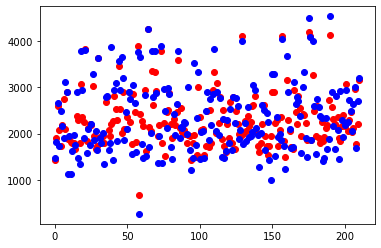

In [51]:
fig, ax = plt.subplots()

ax.scatter(range(0,211,1), Y_pred_knn, c='red')
ax.scatter(range(0,211,1), Y_test, c='blue')
plt.show()

In [52]:
RF = RandomForestRegressor()
Y_pred_RF = RF.fit(std_X_train, Y_train.values.ravel()).predict(std_X_test)

In [53]:
scores = cross_val_score(RF, std_X_train, Y_train.values.ravel())
print(scores)

[0.61315676 0.71680141 0.73370845 0.58844042 0.67216552]


In [54]:
GBM = GradientBoostingRegressor()
Y_pred_GBM = GBM.fit(std_X_train, Y_train.values.ravel()).predict(std_X_test)

In [55]:
scores = cross_val_score(GBM, std_X_train, Y_train.values.ravel())
print(scores)

[0.67075433 0.71653182 0.71357362 0.61504212 0.66378194]


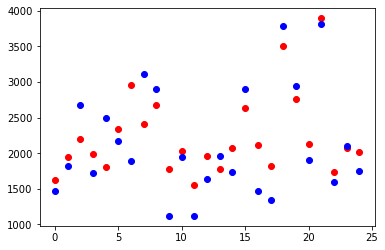

In [56]:
fig, ax = plt.subplots()

ax.scatter(range(0,25,1), Y_pred_GBM[0:25], c='red')
ax.scatter(range(0,25,1), Y_test[0:25], c='blue')
plt.show()

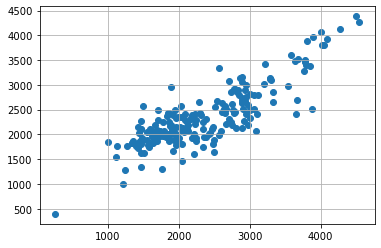

In [57]:
fig, ax = plt.subplots()

ax.scatter(Y_test, Y_pred_GBM)
plt.grid()
plt.show()

In [58]:
GBM_rmse = mean_squared_error(Y_test, Y_pred_GBM, squared=False)
print(GBM_rmse)

409.52984574386153


In [59]:
select_feature = RFE(LR, n_features_to_select=4)
selected = select_feature.fit(std_X_train, Y_train)

In [60]:
selected.support_

array([ True,  True,  True, False, False,  True, False, False, False])

In [61]:
selected.score(std_X_train, Y_train)

0.748008323740775

In [62]:
Y_pred_select = selected.predict(std_X_test)

In [63]:
r2_select = r2_score(Y_test, Y_pred_select)
print(r2_select)

0.7348888080879632


In [64]:
select_features = RFE(ridge_mod, n_features_to_select=4)
selected2 = select_features.fit(std_X_train, Y_train)

In [65]:
selected2.support_

array([ True,  True,  True, False, False,  True, False, False, False])

In [66]:
selected2.score(std_X_train, Y_train)

0.7435557690929551

In [67]:
svm_mod = SVR(kernel='linear')
svm_mod.fit(std_X_train, Y_train.values.ravel())

SVR(kernel='linear')

In [68]:
scores = cross_val_score(svm_mod, std_X_train, Y_train.values.ravel())
print(scores)

[0.47899999 0.42524868 0.39152372 0.41170125 0.36026595]


In [69]:
Y_pred_svm = svm_mod.predict(std_X_test)

In [70]:
r2_svm = r2_score(Y_test, Y_pred_svm)
print(r2_svm)

0.4152167918984766


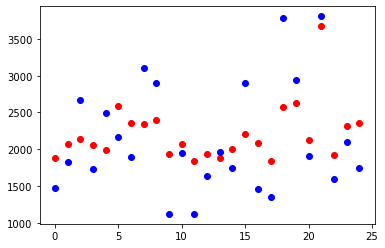

In [71]:
fig, ax = plt.subplots()

ax.scatter(range(0,25,1), Y_pred_svm[0:25], c='red')
ax.scatter(range(0,25,1), Y_test[0:25], c='blue')
plt.show()

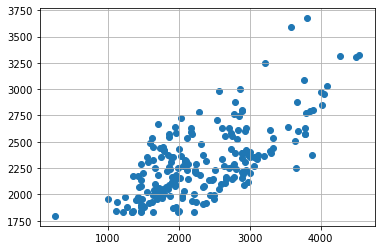

In [72]:
fig, ax = plt.subplots()

ax.scatter(Y_test, Y_pred_svm)
plt.grid()
plt.show()

In [73]:
LR.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [74]:
lr_params = { "fit_intercept" : Categorical([True, False]), 
            "positive" : Categorical([True,False])}

In [75]:
lin_reg_search = BayesSearchCV(LR, lr_params, n_iter=10, cv=5, random_state=63)

In [76]:
lin_reg_search.fit(std_X_train, Y_train)

BayesSearchCV(cv=5, estimator=LinearRegression(), n_iter=10, random_state=63,
              search_spaces={'fit_intercept': Categorical(categories=(True, False), prior=None),
                             'positive': Categorical(categories=(True, False), prior=None)})

In [77]:
lin_reg_search.best_params_

OrderedDict([('fit_intercept', True), ('positive', False)])

In [78]:
lin_reg_search.best_score_

0.754399328059695

In [79]:
Y_pred_lrs =lin_reg_search.predict(std_X_test)

In [80]:
lin_reg_search_score = r2_score(Y_test, Y_pred_lrs)
print(lin_reg_search_score)

0.7688120322202453


In [81]:
lasso_mod.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [82]:
lasso_params = { "alpha" : Real(1e-3, 5), "warm_start" : Categorical([True, False]) }

In [83]:
lasso_reg_search = BayesSearchCV(lasso_mod, lasso_params, cv=5, random_state=63)

In [84]:
lasso_reg_search.fit(std_X_train, Y_train)

BayesSearchCV(cv=5, estimator=Lasso(), random_state=63,
              search_spaces={'alpha': Real(low=0.001, high=5, prior='uniform', transform='normalize'),
                             'warm_start': Categorical(categories=(True, False), prior=None)})

In [85]:
lasso_reg_search.best_params_

OrderedDict([('alpha', 0.7595937231571843), ('warm_start', True)])

In [86]:
lasso_reg_search.cv_results_

{'mean_fit_time': array([0.00318661, 0.00468349, 0.0027359 , 0.00218172, 0.0023922 ,
        0.00189476, 0.00210819, 0.00322814, 0.00486121, 0.00239196,
        0.00310068, 0.        , 0.00310163, 0.00312533, 0.0004673 ,
        0.00235796, 0.0031003 , 0.00322561, 0.00310063, 0.00310082,
        0.00310054, 0.00213346, 0.00312495, 0.00562673, 0.00373588,
        0.00310049, 0.00310059, 0.        , 0.00312462, 0.00010071,
        0.00310063, 0.00312529, 0.00280824, 0.0031003 , 0.        ,
        0.00090075, 0.00470161, 0.        , 0.00388246, 0.        ,
        0.00632653, 0.        , 0.        , 0.00310063, 0.00233502,
        0.00632677, 0.00310054, 0.00600772, 0.00310082, 0.00141683]),
 'std_fit_time': array([0.00392986, 0.00606976, 0.00021193, 0.00076592, 0.00048869,
        0.00019708, 0.00047834, 0.00076127, 0.00049816, 0.00048831,
        0.00620136, 0.        , 0.00405655, 0.00625067, 0.0009346 ,
        0.00050062, 0.0062006 , 0.00645123, 0.00620127, 0.00620165,
        0.006

In [87]:
lasso_reg_search.best_score_

0.7557086788126341

In [88]:
Y_pred_lasso_tuned = lasso_reg_search.predict(std_X_test)

In [89]:
lasso_score = r2_score(Y_test, Y_pred_lasso_tuned)
print(lasso_score)

0.7692655786466531


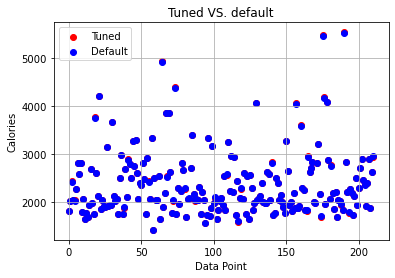

In [90]:
tl = plt.scatter(range(0,211,1), Y_pred_lasso_tuned, c='red')
dl = plt.scatter(range(0,211,1), Y_pred_lasso, c='blue')
#ad = plt.scatter(range(0,211,1), Y_test_, c='green')
plt.title("Tuned VS. default")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((tl, dl),("Tuned", "Default") )
plt.grid()
plt.show()

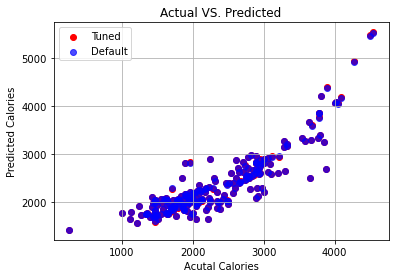

In [91]:

tl = plt.scatter(Y_test, Y_pred_lasso_tuned, c="red")
dl = plt.scatter(Y_test, Y_pred_lasso, c="blue", alpha=0.7)
plt.xlabel("Acutal Calories")
plt.ylabel('Predicted Calories')
plt.title("Actual VS. Predicted")
plt.legend((tl, dl,),("Tuned", "Default") )
plt.grid()
plt.show()

In [92]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [93]:
knn_params = { "n_neighbors" : Integer(2,15), "weights" : Categorical(['uniform', 'distance']),
              "algorithm" : Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']), "leaf_size" : Integer(5,40), 
            "p" : Real(1,3) }

In [94]:
knn_reg_search = BayesSearchCV(knn, knn_params, cv=5 )

In [95]:
knn_reg_search.fit(std_X_train, Y_train)

C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, estimator=KNeighborsRegressor(),
              search_spaces={'algorithm': Categorical(categories=('auto', 'ball_tree', 'kd_tree', 'brute'), prior=None),
                             'leaf_size': Integer(low=5, high=40, prior='uniform', transform='normalize'),
                             'n_neighbors': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                             'p': Real(low=1, high=3, prior='uniform', transform='normalize'),
                             'weights': Categorical(categories=('uniform', 'distance'), prior=None)})

In [96]:
knn_reg_search.best_params_

OrderedDict([('algorithm', 'auto'),
             ('leaf_size', 5),
             ('n_neighbors', 4),
             ('p', 2.781130601231312),
             ('weights', 'distance')])

In [97]:
knn_reg_search.best_score_

0.6241133906044566

In [98]:
ridge_mod.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [99]:
ridge_params = { "alpha" : Real(1e-3, 5), "solver" : Categorical(['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag',
                                                                 'saga'])}

In [100]:
ridge_reg_search = BayesSearchCV(ridge_mod, ridge_params, cv=5 )

In [101]:
ridge_reg_search.fit(std_X_train, Y_train)

C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\63sha\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\63sha\

BayesSearchCV(cv=5, estimator=Ridge(),
              search_spaces={'alpha': Real(low=0.001, high=5, prior='uniform', transform='normalize'),
                             'solver': Categorical(categories=('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), prior=None)})

In [102]:
ridge_reg_search.best_params_

OrderedDict([('alpha', 0.20722312085123257), ('solver', 'auto')])

In [103]:
ridge_reg_search.best_score_

0.7555670811939013

In [104]:
Y_pred_ridge_tuned = ridge_reg_search.predict(std_X_test)

In [105]:
ridge_score = r2_score(Y_test, Y_pred_ridge_tuned)
print(ridge_score)

0.769086495144111


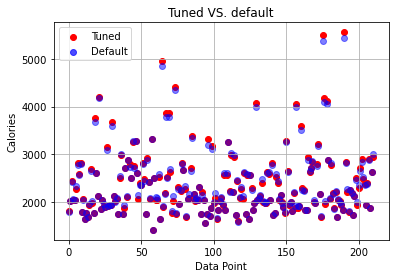

In [106]:
tr = plt.scatter(range(0,211,1), Y_pred_ridge_tuned, c='red')
dr = plt.scatter(range(0,211,1), Y_pred_ridge, c='blue', alpha=0.5)
#ad = plt.scatter(range(0,211,1), Y_test_, c='green')
plt.title("Tuned VS. default")
plt.xlabel("Data Point")
plt.ylabel('Calories')
plt.legend((tl, dl),("Tuned", "Default") )
plt.grid()
plt.show()

In [107]:
GBM.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [108]:
GBM_params = { "loss" : Categorical(['squared_error', 'absolute_error', 'huber', 'quantile']), "learning_rate" : Real(0.01, 3),
              "n_estimators" : Integer(50,250), "subsample" : Real(0.01, 1), "min_samples_split" : Real(0.01, 1),
              "min_samples_leaf" : Integer(1,10), "min_weight_fraction_leaf" : Real(0.01, 0.5), "max_depth" : Integer(1,10), 
              "min_impurity_decrease" : Real(0.01, 5), "max_features" : Real(0.01, 1), "alpha" : Real(0.01,0.99)}

In [109]:
GBM_reg_search = BayesSearchCV(GBM, GBM_params, cv=5 )

In [110]:
GBM_reg_search.fit(std_X_train, Y_train.values.ravel())

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(),
              search_spaces={'alpha': Real(low=0.01, high=0.99, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=3, prior='uniform', transform='normalize'),
                             'loss': Categorical(categories=('squared_error', 'absolute_error', 'huber', 'quantile'), prior=None),
                             'max_depth': Integer(low=1, high=10, p...
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                             'min_weight_fraction_leaf': Real(low=0.01, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=250, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.01, high

In [111]:
GBM_reg_search.best_params_

OrderedDict([('alpha', 0.14564949556812695),
             ('learning_rate', 1.4245146392748023),
             ('loss', 'absolute_error'),
             ('max_depth', 2),
             ('max_features', 0.6877352914802453),
             ('min_impurity_decrease', 4.997007946720449),
             ('min_samples_leaf', 8),
             ('min_samples_split', 0.3928248714643852),
             ('min_weight_fraction_leaf', 0.15910835799995232),
             ('n_estimators', 176),
             ('subsample', 1.0)])

In [112]:
GBM_reg_search.best_score_

0.4684406493243194

In [113]:
svm_mod.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [114]:
svm = SVR()

In [115]:
svm_params = { "kernel" : Categorical(['linear', 'poly', 'rbf', 'sigmoid']), "degree" : Integer(1,10), 
              "gamma" : Real(1e-3, 1), "coef0" : Real(0,2), "C" : Real(0.1, 5), "epsilon" : Real(0.01, 1) }

In [116]:
svm_reg_search =  BayesSearchCV(svm, svm_params, cv=5 )

In [117]:
svm_reg_search.fit(std_X_train, Y_train.values.ravel())

BayesSearchCV(cv=5, estimator=SVR(),
              search_spaces={'C': Real(low=0.1, high=5, prior='uniform', transform='normalize'),
                             'coef0': Real(low=0, high=2, prior='uniform', transform='normalize'),
                             'degree': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'epsilon': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                             'gamma': Real(low=0.001, high=1, prior='uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'poly', 'rbf', 'sigmoid'), prior=None)})

In [118]:
svm_reg_search.best_params_

OrderedDict([('C', 5.0),
             ('coef0', 1.480011170780389),
             ('degree', 2),
             ('epsilon', 1.0),
             ('gamma', 0.4913807100188245),
             ('kernel', 'linear')])

In [119]:
svm_reg_search.best_score_

0.5150377589485787